# Predict Customer Sentiment

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D

Using TensorFlow backend.


### Load Data

In [2]:
# Read data
data = pd.read_csv('Usecase3_Dataset.csv')

In [3]:
# checking data content
data

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,American,@AmericanAir Please bring American Airlines to...
14638,negative,American,"@AmericanAir you have my money, you change my ..."


In [4]:
# Check missing values
data.isna().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

In [5]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
airline_sentiment    14640 non-null object
airline              14640 non-null object
text                 14640 non-null object
dtypes: object(3)
memory usage: 343.2+ KB


### Exploratory Data Analysis

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


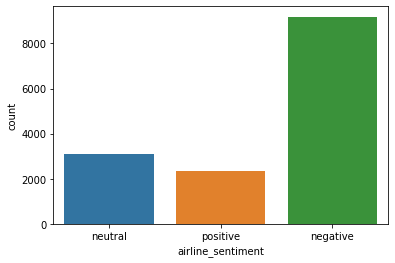

In [6]:
# Distribution of sentiments
print(data.airline_sentiment.value_counts())
sns.countplot(data = data, x = 'airline_sentiment')

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


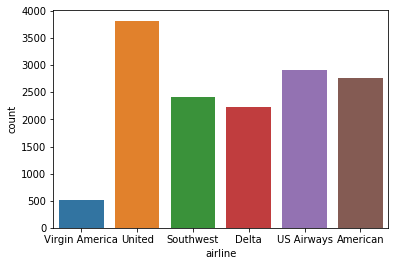

In [7]:
# Distribution of Airlines
print(data.airline.value_counts())
sns.countplot(data = data, x = 'airline')

negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64 Virgin America
negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64 United
negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64 Southwest
negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64 Delta
negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64 US Airways
negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64 American


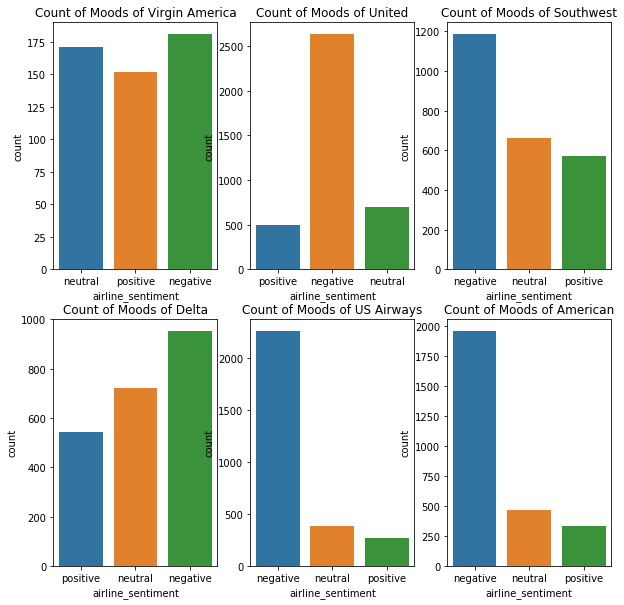

In [8]:
#Number of sentiment for each airline 
plt.figure(1,figsize=(10,10))
airlines= ['Virgin America','United','Southwest','Delta','US Airways','American']
for i in airlines:
    indices=airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_value=data[data['airline']==i]
    print(new_value['airline_sentiment'].value_counts(),i)
    Index = [1,2,3]
    sns.countplot(new_value['airline_sentiment'])
    plt.title('Count of Moods of '+i)

### Data Pre-Processsing

In [9]:
# cleaning data set
data['text'] = data['text'].apply(lambda x: x.lower()) # convert all to lower
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # remove anything except alphanumeric
print(data['text'][:10])

0                     virginamerica what dhepburn said
1    virginamerica plus youve added commercials to ...
2    virginamerica i didnt today must mean i need t...
3    virginamerica its really aggressive to blast o...
4    virginamerica and its a really big bad thing a...
5    virginamerica seriously would pay 30 a flight ...
6    virginamerica yes nearly every time i fly vx t...
7    virginamerica really missed a prime opportunit...
8             virginamerica well i didntbut now i do d
9    virginamerica it was amazing and arrived an ho...
Name: text, dtype: object


In [10]:
# Seperate independent and dependent variable
X = data.drop(['airline_sentiment'],axis=1)
y = data.airline_sentiment

In [11]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in target variable
y = label_encoder.fit_transform(y)
y

array([1, 2, 1, ..., 1, 0, 1])

In [12]:
# Check length of texts
X['len_text'] = X['text'].apply(len)

Text(0.5, 1.0, 'Length Histogram')

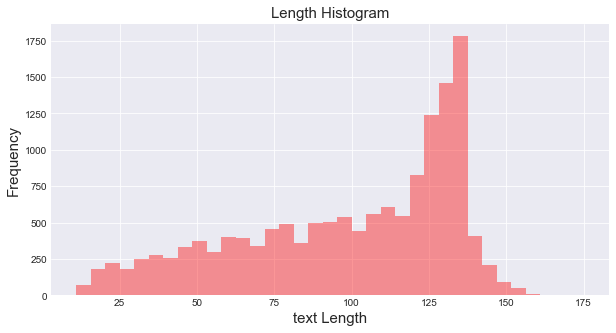

In [13]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
sns.distplot(X['len_text'],kde=False,color='red',hist=True)
plt.xlabel("text Length",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Length Histogram",size=15)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=15000)
X1 = cv.fit_transform(X['text']).toarray()

In [15]:
X1.shape

(14640, 15000)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=42)

### Machine Learning Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred) * 100, "%")

77.76639344262296 %


### Deep Learning Model

In [19]:

from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Embedding, Dropout, Input

In [20]:
#tokenization

max_words = 1500
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [21]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'i': 3,
 'a': 4,
 'united': 5,
 'you': 6,
 'for': 7,
 'flight': 8,
 'on': 9,
 'and': 10,
 'my': 11,
 'usairways': 12,
 'americanair': 13,
 'is': 14,
 'in': 15,
 'southwestair': 16,
 'jetblue': 17,
 'of': 18,
 'me': 19,
 'it': 20,
 'your': 21,
 'have': 22,
 'was': 23,
 'not': 24,
 'with': 25,
 'that': 26,
 'at': 27,
 'no': 28,
 'this': 29,
 'get': 30,
 'but': 31,
 'be': 32,
 'from': 33,
 'can': 34,
 'are': 35,
 'thanks': 36,
 'cancelled': 37,
 'we': 38,
 'now': 39,
 'an': 40,
 'just': 41,
 'service': 42,
 'do': 43,
 'so': 44,
 'been': 45,
 'help': 46,
 'time': 47,
 'im': 48,
 'will': 49,
 'customer': 50,
 'up': 51,
 'out': 52,
 'our': 53,
 'they': 54,
 'us': 55,
 'hours': 56,
 'what': 57,
 'when': 58,
 'flights': 59,
 '2': 60,
 'amp': 61,
 'hold': 62,
 'how': 63,
 'its': 64,
 'if': 65,
 'plane': 66,
 'all': 67,
 'thank': 68,
 'why': 69,
 'cant': 70,
 'there': 71,
 'still': 72,
 'please': 73,
 'one': 74,
 'need': 75,
 'would': 76,
 'delayed': 77,
 'virginamerica': 7

In [22]:
embedding_out_dim = 256
lstm_out_dim = 256

model = Sequential()
model.add(Embedding(max_words, embedding_out_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out_dim))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 256)           384000    
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 910,083
Trainable params: 910,083
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# data set to train
Y = pd.get_dummies(data['airline_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11712, 32) (11712, 3)
(2928, 32) (2928, 3)


In [24]:
X_val = X_train[:500]
Y_val = Y_train[:500]

In [25]:
partial_X_train = X_train[500:]
partial_Y_train = Y_train[500:]

In [26]:
# train the net
batch_size = 512
history = model.fit(X_train,Y_train, 
                    epochs = 10, 
                    batch_size=batch_size,
                    validation_data=(X_val, Y_val))

Epoch 1/10
23/23 [==============================] - 17s 727ms/step - loss: 0.8853 - accuracy: 0.6372 - val_loss: 0.7219 - val_accuracy: 0.7080
Epoch 2/10
23/23 [==============================] - 18s 804ms/step - loss: 0.6599 - accuracy: 0.7308 - val_loss: 0.5424 - val_accuracy: 0.7860
Epoch 3/10
23/23 [==============================] - 17s 733ms/step - loss: 0.5083 - accuracy: 0.8034 - val_loss: 0.4120 - val_accuracy: 0.8440
Epoch 4/10
23/23 [==============================] - 18s 767ms/step - loss: 0.4167 - accuracy: 0.8397 - val_loss: 0.3792 - val_accuracy: 0.8460
Epoch 5/10
23/23 [==============================] - 17s 757ms/step - loss: 0.3822 - accuracy: 0.8515 - val_loss: 0.3570 - val_accuracy: 0.8620
Epoch 6/10
23/23 [==============================] - 18s 766ms/step - loss: 0.3590 - accuracy: 0.8624 - val_loss: 0.3367 - val_accuracy: 0.8780
Epoch 7/10
23/23 [==============================] - 17s 726ms/step - loss: 0.3426 - accuracy: 0.8700 - val_loss: 0.3323 - val_accuracy: 0.8640